## Импорт библиотек

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import warnings

## Загрузка данных

Загружаем данные для каждого количества комнат и объединяем их.

In [2]:
df_s=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\STUDIYA.csv")
df_1=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\1k.csv")
df_2=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\2k.csv")
df_3=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\3k.csv")
df_4=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\4k.csv")
df_5=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\5k.csv")
df_mul=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\mul.csv")
df=pd.concat([df_s,df_1,df_2,df_3,df_4,df_5, df_mul], ignore_index=True)
df_raw=df.drop('Unnamed: 0', axis=1)
df_raw=df_raw.rename(columns={'coords_len':'coord_len'})
df_raw

,metro_name,time_to_metro,num_rooms,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
0,Цветной бульвар,до 5 мин.,Cтудия,"36,7",NaN,NaN,дизайнерский,21000000.0,4.0,1.0,"Москва, Трубная ул., 29с2",2023-04-29,55.772102,37.624480,https://www.avito.ru/moskva/kvartiry/kvartira-...
1,Ясенево,6–10 мин.,Cтудия,26 м,NaN,NaN,евро,3174900.0,16.0,16.0,"Москва, ул. Паустовского, 8к3",2023-04-29,55.599967,37.536365,https://www.avito.ru/moskva/kvartiry/kvartira-...
2,Улица академика Янгеля,от 31 мин.,Cтудия,10 м,1973.0,NaN,требует ремонта,2500000.0,12.0,1.0,"Москва, Медынская ул., 4/1",2023-04-29,55.592490,37.645717,https://www.avito.ru/moskva/kvartiry/kvartira-...
3,Братиславская,21–30 мин.,Cтудия,"24,5",NaN,NaN,NaN,5700000.0,26.0,9.0,"ул. Люблинская, вл. 72, корп. 11",2023-04-29,55.665770,37.734130,https://www.avito.ru/moskva/kvartiry/kvartira-...
4,Панфиловская,6–10 мин.,Cтудия,"13,3",1960.0,NaN,дизайнерский,4900000.0,1.0,1.0,"Москва, ул. Маршала Конева, 2",2023-04-29,55.799952,37.491889,https://www.avito.ru/moskva/kvartiry/kvartira-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46490,Мякинино,20.0,1,27.8,2008.0,8.0,требует ремонта,4490000.0,3.0,2.0,"Москва, 5-я Мякининская ул., 49",2023-01-13,55.811133,37.379438,https://avito.ru//moskva/kvartiry/1-k._kvartir...
46491,Новокузнецкая,10.0,2,86.0,1908.0,12.0,евро,37900000.0,5.0,3.0,"Москва, Кадашёвская наб., 36с4",2023-01-13,55.745372,37.626088,https://avito.ru//moskva/kvartiry/2-k._kvartir...
46492,Первомайская,5.0,3,107.0,2010.0,28.0,дизайнерский,49500000.0,22.0,3.0,"Москва, 10-я Парковая улица, 3",2023-01-13,55.794365,37.801423,https://avito.ru//moskva/kvartiry/3-k._kvartir...
46493,Селигерская,15.0,1,38.0,2004.0,9.0,дизайнерский,14500000.0,17.0,4.0,"Москва, Дубнинская ул., 39",2023-01-13,55.867592,37.562824,https://avito.ru//moskva/kvartiry/1-k._kvartir...


Посмотрим общую информацию о датафрейме

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46495 entries, 0 to 46494
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   metro_name     44198 non-null  object 
 1   time_to_metro  44665 non-null  object 
 2   num_rooms      46476 non-null  object 
 3   total_area     46476 non-null  object 
 4   year_house     22298 non-null  float64
 5   kitchen_area   43809 non-null  object 
 6   repair         36148 non-null  object 
 7   price          46476 non-null  float64
 8   floors         46467 non-null  float64
 9   num_floor      46467 non-null  float64
 10  address        46469 non-null  object 
 11  date           46473 non-null  object 
 12  coord_width    46469 non-null  float64
 13  coord_len      46469 non-null  float64
 14  link           46495 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.3+ MB


In [4]:
df_raw.groupby('num_rooms').count()

,metro_name,time_to_metro,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
num_rooms,,,,,,,,,,,,,,
1.0,10678,10791,11424,5277,11189,8322,11424,11419,11419,11420,11423,11420,11420,11424
2.0,13886,14110,14876,6785,14609,10756,14876,14875,14875,14875,14876,14875,14875,14876
3.0,9857,9976,10277,4939,10119,8089,10277,10277,10277,10277,10277,10277,10277,10277
4.0,5441,5452,5525,2594,5514,4813,5525,5525,5525,5525,5525,5525,5525,5525
5,1779,1779,1786,794,1785,1641,1786,1786,1786,1786,1786,1786,1786,1786
6,588,588,592,240,592,543,592,592,592,592,592,592,592,592
Cтудия,1969,1969,1996,1669,1,1984,1996,1993,1993,1994,1994,1994,1994,1996


Размер датафрейма

In [5]:
df_raw.shape

(46495, 15)

Списки числовых и категориальных признаков

In [6]:
num_col=['time_to_metro', 'total_area','year_house','kitchen_area','coord_width','coord_len','floors', 'num_floor']
cat_col=['metro_name','time_to_metro','num_rooms', 'date', 'repair']
cat_col

['metro_name', 'time_to_metro', 'num_rooms', 'date', 'repair']

## Исправление ошибок парсинга

Удалим дубликаты. Дубликаты ищутся по подмножеству признаков: адрес, этаж,колиечство комнат, общая площадь

In [7]:
n_duplicates = df.duplicated(
    subset=['address', 'num_floor', 'num_rooms', 'total_area'],keep='first').sum()
print(f'Количество дубликатов: {n_duplicates}')
df_raw = df_raw.drop_duplicates(
    subset=['address', 'num_floor', 'num_rooms', 'total_area'],
    keep='last')
old_ad=len(df[df['date']<'2023-01-01'])
print(f"Количество старых объявлений (до 2023 года): {old_ad}")

Количество дубликатов: 4031
Количество старых объявлений (до 2023 года): 7752


Удалим в столбцах лишние символы, преобразуем данные к определенному типу. На RuntimeWarning не стоит обращать внимания.

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    df_raw.time_to_metro=df_raw.time_to_metro.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
    df_raw.total_area=df_raw.total_area.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
    df_raw.kitchen_area=df_raw.kitchen_area.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
    df_raw.date=df_raw.date.astype('str')

Удаляем nan значения в price

In [9]:
df_raw=df_raw.dropna(subset=['price'])

Подготовим признак количeства комнат

In [10]:
df_raw.num_rooms=df_raw.num_rooms.transform(lambda x: '0' if str(x).strip()=='Cтудия' else x)
df_raw.num_rooms=df_raw.num_rooms.astype('float')

In [11]:
df_raw.groupby('num_rooms').count()

,metro_name,time_to_metro,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
num_rooms,,,,,,,,,,,,,,
0.0,1203,1203,1222,957,1,1213,1222,1220,1220,1221,1222,1221,1221,1222
1.0,10103,10215,10750,4996,10523,7863,10750,10745,10745,10746,10750,10746,10746,10750
2.0,13094,13314,13997,6409,13747,10153,13997,13996,13996,13996,13997,13996,13996,13997
3.0,9201,9317,9597,4640,9442,7561,9597,9597,9597,9597,9597,9597,9597,9597
4.0,4752,4763,4831,2275,4820,4177,4831,4831,4831,4831,4831,4831,4831,4831
5.0,1530,1530,1537,670,1536,1412,1537,1537,1537,1537,1537,1537,1537,1537
6.0,526,526,529,216,529,483,529,529,529,529,529,529,529,529


## Работа с выбросами

Создадим словарь максимальных площадей квартир для каждого количества комнат .Максимальное значение будем брать, как 2 межквартильных расстояния, отложенное от верхнего квартиля, а не как обычно 1.5. А минимальное зададим вручную.

boxplot for 0 rooms
count    1222.000000
mean       14.313421
std        11.454105
min         5.500000
25%        10.000000
50%        12.000000
75%        17.000000
max       343.000000
Name: total_area, dtype: float64


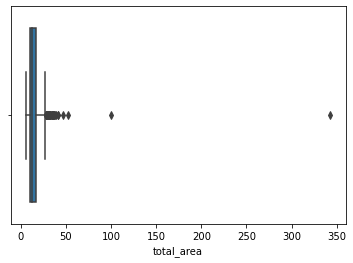

boxplot for 1 rooms
count    10750.000000
mean        22.424233
std         25.521403
min          5.000000
25%         18.500000
50%         20.500000
75%         23.000000
max       1050.000000
Name: total_area, dtype: float64


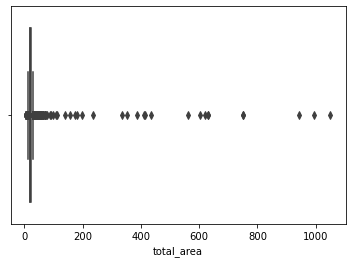

boxplot for 2 rooms
count    13997.000000
mean        31.061585
std         11.055299
min          9.500000
25%         25.000000
50%         29.000000
75%         34.000000
max        374.500000
Name: total_area, dtype: float64


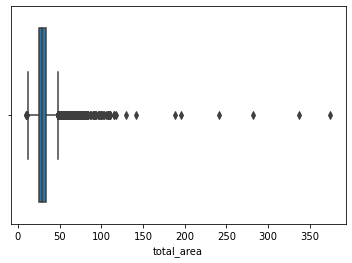

boxplot for 3 rooms
count    9597.000000
mean       46.760759
std        20.753164
min        11.500000
25%        35.500000
50%        41.000000
75%        50.500000
max       429.000000
Name: total_area, dtype: float64


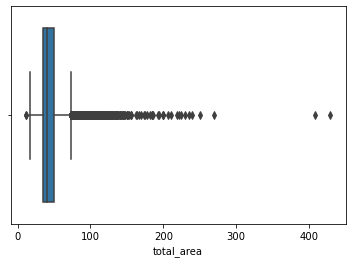

boxplot for 4 rooms
count    4831.000000
mean      105.593355
std        55.392225
min        22.500000
25%        59.000000
50%        97.000000
75%       138.000000
max       402.000000
Name: total_area, dtype: float64


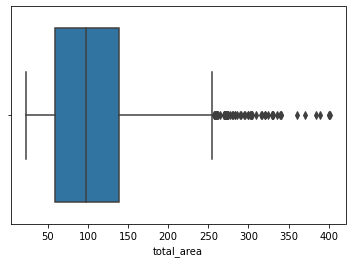

boxplot for 6 rooms
count     529.000000
mean      240.840265
std       142.362901
min        52.000000
25%       135.000000
50%       215.000000
75%       300.000000
max      1040.000000
Name: total_area, dtype: float64


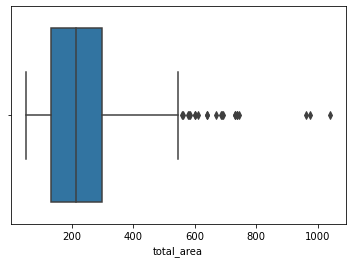

boxplot for 5 rooms
count    1537.000000
mean      165.135979
std        90.526087
min        22.000000
25%       100.500000
50%       145.000000
75%       209.000000
max       885.000000
Name: total_area, dtype: float64


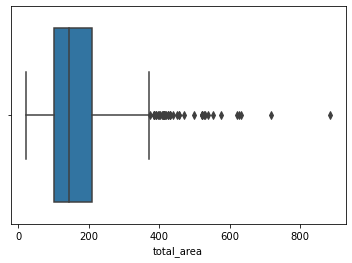

{0.0: 31.0, 1.0: 32.0, 2.0: 52.0, 3.0: 80.5, 4.0: 296.0, 6.0: 630.0, 5.0: 426.0}


In [12]:
dict_max_ta={}
dict_min_ta={}
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['total_area'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['total_area'].describe()
    print(desc_tab)
    dict_max_ta[i]=desc_tab['75%']+2*(desc_tab['75%']-desc_tab['25%'])
    plt.show()
dict_min_ta={0:7.0,1:12.0, 2:20.0,3:25.0, 4: 30.0, 5:35.0, 6:40.0}
print(dict_max_ta)

Создадим список индексов, которые нужно удалить

In [13]:
drop_index=[]
for i in df_raw.num_rooms.unique():

    drop_index.extend(df_raw[(df_raw['num_rooms']==i) & (df_raw['total_area']>dict_max_ta[i])].index.tolist())
    drop_index.extend(df_raw[(df_raw['num_rooms']==i) & (df_raw['total_area']<dict_min_ta[i])].index.tolist())    
df_raw=df_raw.drop(index=drop_index, axis=0)
print(f'Количество удаленных выбросов total_area: {len(drop_index)}')

Количество удаленных выбросов total_area: 2637


Посмотрим распределение площадей для каждого количества комнат после удаления выбросов. Не стоит обращать внимания на то, что у нас слева есть выбросы, хотя по идее мы взяли 1.5 межквартильных расстояния, что и должно равняться расстоянию до "уса". Дело в том, что внизу получились новые боксплоты, с новыми межквартильными расстояниями.

boxplot for 0 rooms
count    1168.000000
mean       13.729024
std         5.137441
min         7.000000
25%        10.000000
50%        12.250000
75%        16.000000
max        31.000000
Name: total_area, dtype: float64


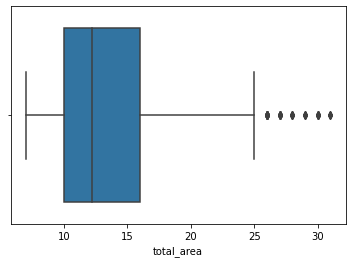

boxplot for 1 rooms
count    9874.000000
mean       20.613632
std         3.349755
min        12.000000
25%        18.500000
50%        20.500000
75%        22.500000
max        32.000000
Name: total_area, dtype: float64


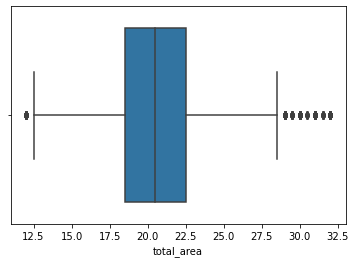

boxplot for 2 rooms
count    12953.000000
mean        29.953601
std          6.323039
min         20.000000
25%         25.500000
50%         29.000000
75%         33.000000
max         52.000000
Name: total_area, dtype: float64


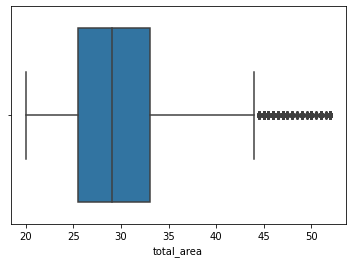

boxplot for 3 rooms
count    9003.000000
mean       42.929301
std        11.626669
min        25.000000
25%        35.000000
50%        40.000000
75%        48.000000
max        80.500000
Name: total_area, dtype: float64


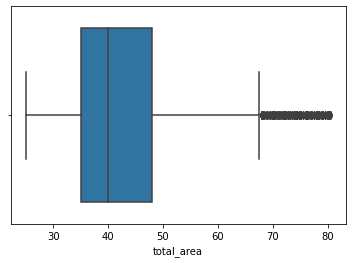

boxplot for 4 rooms
count    4799.000000
mean      104.255678
std        52.515832
min        30.000000
25%        59.000000
50%        97.000000
75%       138.000000
max       296.000000
Name: total_area, dtype: float64


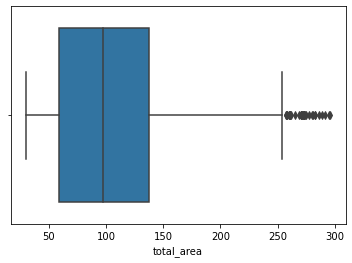

boxplot for 6 rooms
count    515.000000
mean     226.659223
std      113.043154
min       52.000000
25%      135.000000
50%      210.000000
75%      294.250000
max      610.000000
Name: total_area, dtype: float64


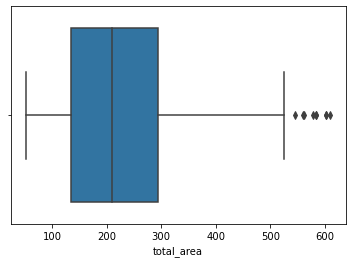

boxplot for 5 rooms
count    1514.000000
mean      159.818362
std        78.071476
min        38.000000
25%       100.000000
50%       144.000000
75%       206.000000
max       425.000000
Name: total_area, dtype: float64


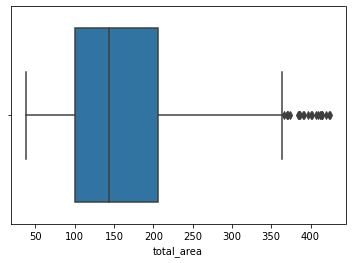

In [14]:
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['total_area'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['total_area'].describe()
    print(desc_tab)

    plt.show()

Посмотрим распределение цены для каждого количества комнат 

boxplot for 0 rooms
count    1.168000e+03
mean     5.408900e+06
std      2.885119e+06
min      2.300000e+06
25%      3.650000e+06
50%      4.450000e+06
75%      5.792500e+06
max      2.350000e+07
Name: price, dtype: float64


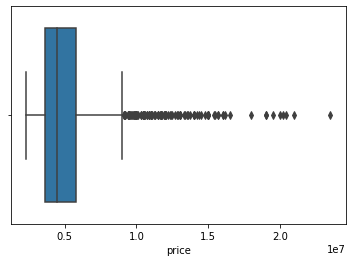

boxplot for 1 rooms
count    9.874000e+03
mean     1.187680e+07
std      5.589060e+06
min      6.000000e+04
25%      8.500000e+06
50%      1.030000e+07
75%      1.350000e+07
max      6.623440e+07
Name: price, dtype: float64


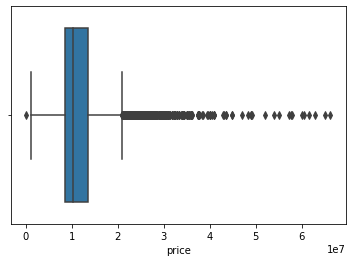

boxplot for 2 rooms
count    1.295300e+04
mean     1.860149e+07
std      1.191029e+07
min      1.150000e+04
25%      1.150000e+07
50%      1.485361e+07
75%      2.220000e+07
max      2.600000e+08
Name: price, dtype: float64


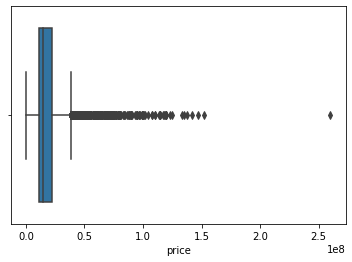

boxplot for 3 rooms
count    9.003000e+03
mean     3.044160e+07
std      2.688627e+07
min      1.000000e+00
25%      1.530000e+07
50%      2.170000e+07
75%      3.567994e+07
max      3.352327e+08
Name: price, dtype: float64


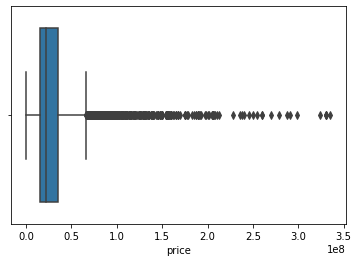

boxplot for 4 rooms
count    4.799000e+03
mean     8.633851e+07
std      8.777313e+07
min      1.800000e+06
25%      3.353042e+07
50%      5.890000e+07
75%      1.090000e+08
max      1.199133e+09
Name: price, dtype: float64


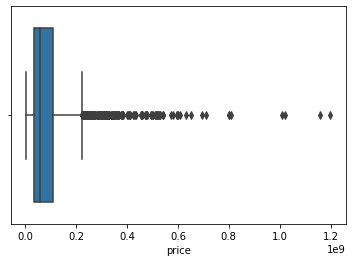

boxplot for 6 rooms
count    5.150000e+02
mean     2.238548e+08
std      1.864666e+08
min      2.298000e+07
25%      9.500000e+07
50%      1.610186e+08
75%      3.000000e+08
max      1.180000e+09
Name: price, dtype: float64


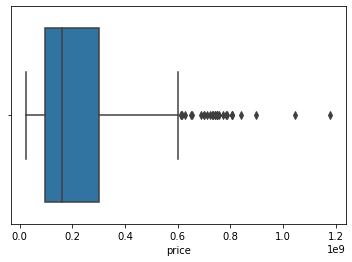

boxplot for 5 rooms
count    1.514000e+03
mean     1.545916e+08
std      1.447366e+08
min      2.000000e+06
25%      6.960000e+07
50%      1.099995e+08
75%      1.980000e+08
max      1.606380e+09
Name: price, dtype: float64


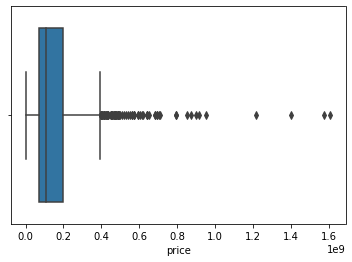

In [15]:
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['price'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['price'].describe()
    print(desc_tab)

    plt.show()

Удалим записи со слишком высокими и низкими ценами.

In [16]:
drop_price=[]
drop_price.extend(df_raw[(df_raw['num_rooms']==1) &( (df_raw['price']>35000000) | (df_raw['price']<800000))].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==2) & ((df_raw['price']>80000000) | (df_raw['price']<1000000))].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==3) & ((df_raw['price']>150000000) | (df_raw['price']<2000000))].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==4) &( (df_raw['price']>400000000) | (df_raw['price']<4000000))].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==5) & ((df_raw['price']>600000000) | (df_raw['price']<10000000))].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==6) & ((df_raw['price']>800000000) | (df_raw['price']<15000000))].index.tolist())
df_raw=df_raw.drop(index=drop_price, axis=0)
print(f'Количество удаленных выбросов price: {len(drop_price)}')

Количество удаленных выбросов price: 286


Посмотрим гистограмму цены для каждого количества комнат после удаления выбросов

boxplot for 0 rooms
count    1.168000e+03
mean     5.408900e+06
std      2.885119e+06
min      2.300000e+06
25%      3.650000e+06
50%      4.450000e+06
75%      5.792500e+06
max      2.350000e+07
Name: price, dtype: float64


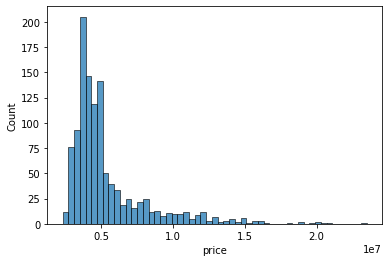

boxplot for 1 rooms
count    9.820000e+03
mean     1.170247e+07
std      5.021669e+06
min      1.191000e+06
25%      8.500000e+06
50%      1.025000e+07
75%      1.350000e+07
max      3.500000e+07
Name: price, dtype: float64


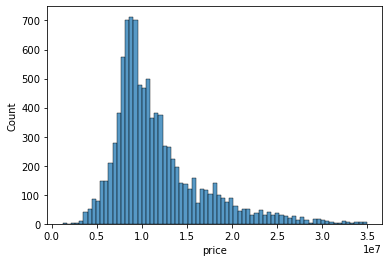

boxplot for 2 rooms
count    1.289000e+04
mean     1.820488e+07
std      1.018372e+07
min      2.200000e+06
25%      1.150000e+07
50%      1.480000e+07
75%      2.200000e+07
max      8.000000e+07
Name: price, dtype: float64


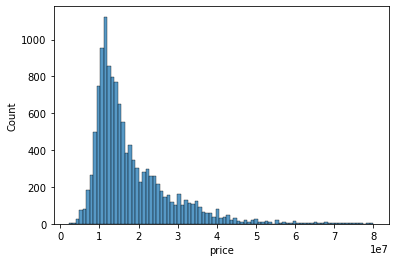

boxplot for 3 rooms
count    8.922000e+03
mean     2.895915e+07
std      2.121744e+07
min      2.500000e+06
25%      1.527030e+07
50%      2.150000e+07
75%      3.500000e+07
max      1.500000e+08
Name: price, dtype: float64


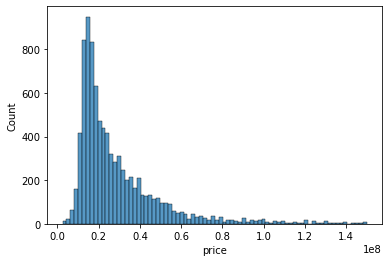

boxplot for 4 rooms
count    4.743000e+03
mean     8.075565e+07
std      6.849029e+07
min      7.970000e+06
25%      3.349900e+07
50%      5.800000e+07
75%      1.026200e+08
max      3.850000e+08
Name: price, dtype: float64


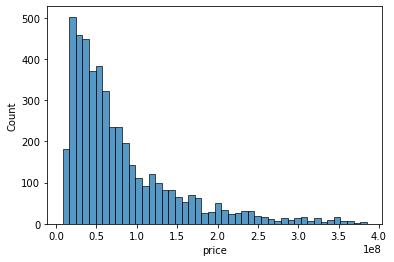

boxplot for 6 rooms
count    5.080000e+02
mean     2.143771e+08
std      1.684455e+08
min      2.298000e+07
25%      9.450000e+07
50%      1.578268e+08
75%      2.950000e+08
max      7.860000e+08
Name: price, dtype: float64


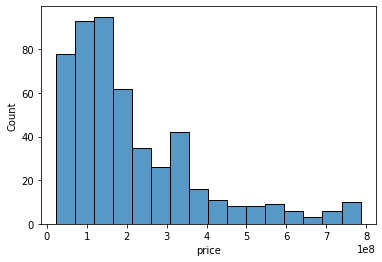

boxplot for 5 rooms
count    1.489000e+03
mean     1.434477e+08
std      1.092510e+08
min      1.048448e+07
25%      6.900000e+07
50%      1.075314e+08
75%      1.854000e+08
max      5.950000e+08
Name: price, dtype: float64


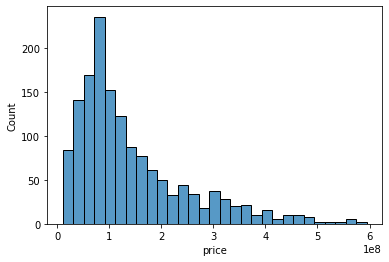

In [17]:
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.histplot(x=df_raw[df_raw['num_rooms']==i]['price'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['price'].describe()
    print(desc_tab)

    plt.show()

Построим диаграммы размахов для каждого числового признака

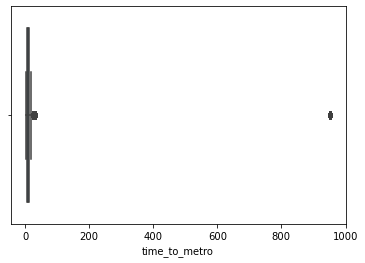

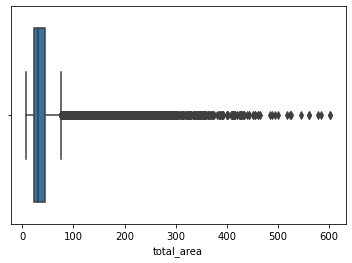

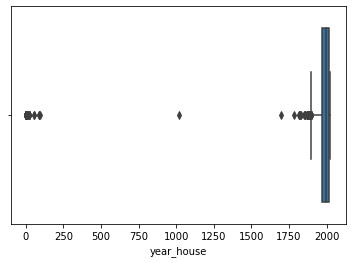

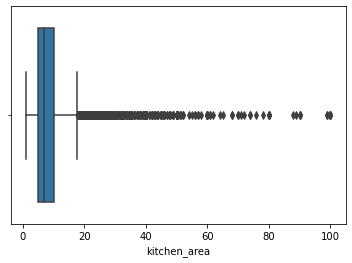

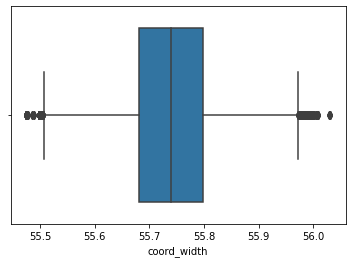

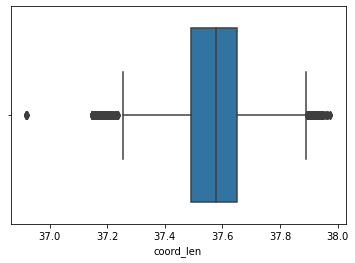

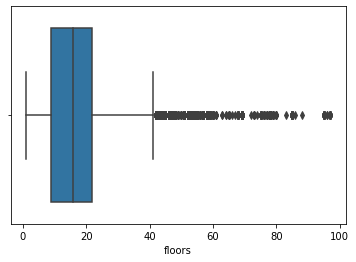

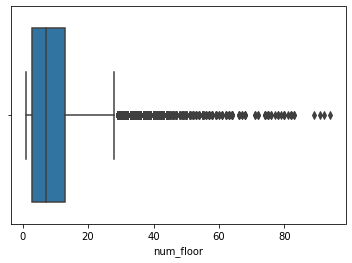

In [18]:
for i in num_col:
    sns.boxplot(x=i, data=df_raw)
    plt.show()

Все числовые признаки распределены приемлимо, кроме года постройки и времени до метро. Присвоим nan значения для признака 'year_house', значения которого меньше 1750, потому что эти значения возникли явно из-за ошибок во время парсинга. Удаоим значения, время до метро у которых больше 40 минут.

In [19]:
df_raw.loc[df_raw['year_house']<1750,'year_house']=np.nan
drop_time=[]
drop_time.extend(df_raw.loc[df_raw['time_to_metro']>40.0,:].index.to_list())
df_raw=df_raw.drop(index=drop_time, axis=0)
print(f"Количество выбросов для времени до метро: {len(drop_time)}")

Количество выбросов для времени до метро: 208


Посмотрим распределение цены

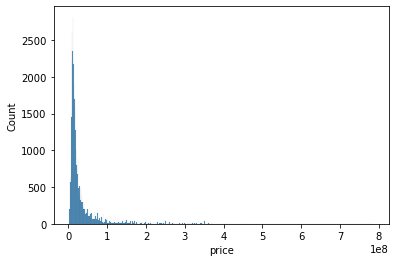

In [20]:
sns.histplot(x='price', data=df_raw)
plt.show()

Посмотрим распределение цены за квадратный метр

<AxesSubplot:ylabel='Count'>

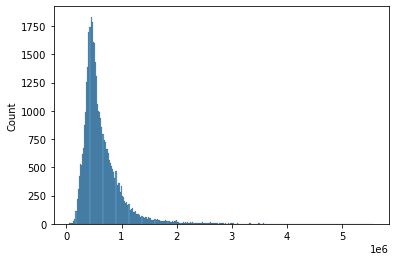

In [21]:
sns.histplot(x=df_raw['price']/df_raw['total_area'])

Удалим слишком высокие цены за квадратный метр

<AxesSubplot:ylabel='Count'>

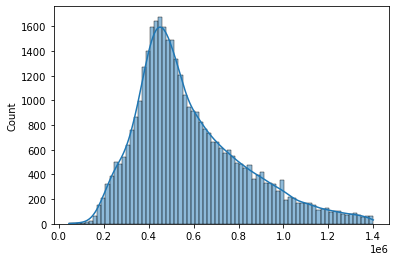

In [22]:
a=df_raw['price']/df_raw['total_area']>1400000
drop_sqm=list(filter(lambda x: a[x], a.index))
df_raw=df_raw.drop(drop_sqm)
sns.histplot(x=df_raw['price']/df_raw['total_area'], kde=True)

Построим boxplot для цены за кв. м.

In [23]:
df_raw.groupby('num_rooms').count()

,metro_name,time_to_metro,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
num_rooms,,,,,,,,,,,,,,
0.0,1150,1150,1168,909,1,1159,1168,1166,1166,1167,1168,1167,1167,1168
1.0,9140,9250,9775,4371,9555,6978,9775,9771,9771,9772,9775,9772,9772,9775
2.0,11774,11982,12613,5627,12372,8994,12613,12612,12612,12612,12613,12612,12612,12613
3.0,8077,8192,8470,4028,8317,6495,8470,8470,8470,8470,8470,8470,8470,8470
4.0,4115,4125,4193,2008,4183,3587,4193,4193,4193,4193,4193,4193,4193,4193
5.0,1209,1209,1216,551,1215,1119,1216,1216,1216,1216,1216,1216,1216,1216
6.0,398,398,401,177,401,363,401,401,401,401,401,401,401,401


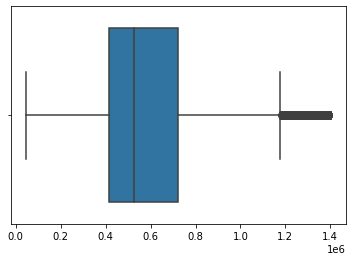

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.boxplot(df_raw['price']/df_raw['total_area'])

In [25]:
df_raw.groupby('num_rooms').count()

,metro_name,time_to_metro,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
num_rooms,,,,,,,,,,,,,,
0.0,1150,1150,1168,909,1,1159,1168,1166,1166,1167,1168,1167,1167,1168
1.0,9140,9250,9775,4371,9555,6978,9775,9771,9771,9772,9775,9772,9772,9775
2.0,11774,11982,12613,5627,12372,8994,12613,12612,12612,12612,12613,12612,12612,12613
3.0,8077,8192,8470,4028,8317,6495,8470,8470,8470,8470,8470,8470,8470,8470
4.0,4115,4125,4193,2008,4183,3587,4193,4193,4193,4193,4193,4193,4193,4193
5.0,1209,1209,1216,551,1215,1119,1216,1216,1216,1216,1216,1216,1216,1216
6.0,398,398,401,177,401,363,401,401,401,401,401,401,401,401


## Обработка nan значений

Распределение nan значений по признакам

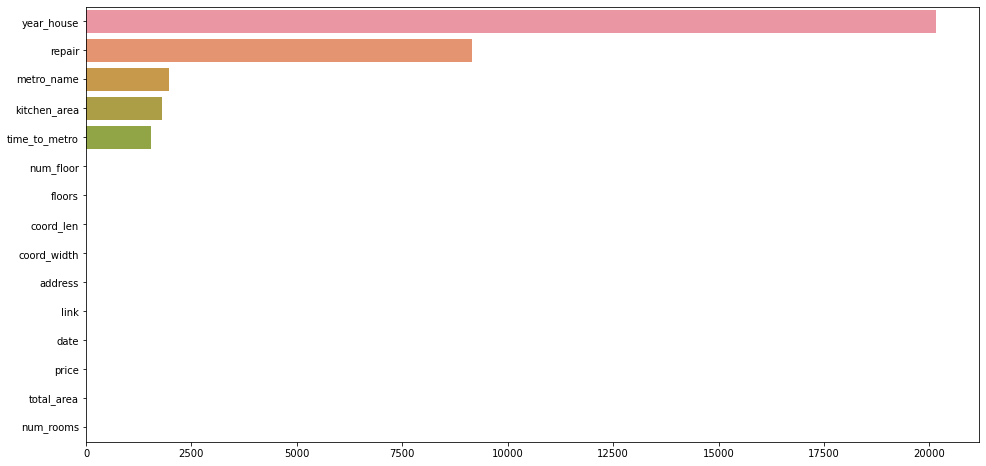

In [26]:
    plt.figure(figsize=(16, 8))
    a=df_raw.isna().sum().sort_values()[::-1]

    sns.barplot(x=a.values, y=a.index)

    plt.show()

Построим корреляцию между 'year_house' и 'price'. Проверим jочищенный от nan значений признак 'year_house' на отсутсвие зависимости с таргетом. Ориентироваться будем на p-value.

In [27]:
df_time=df_raw.dropna(subset=['year_house'])
print(df_time.corr()['year_house']['price'])
y=df_time['price']
x=df_time['year_house']
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

0.09809311569467706
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     171.7
Date:                Fri, 12 May 2023   Prob (F-statistic):           4.86e-39
Time:                        15:50:21   Log-Likelihood:            -3.3122e+05
No. Observations:               17671   AIC:                         6.624e+05
Df Residuals:                   17669   BIC:                         6.625e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.148e+08   1.83e+07

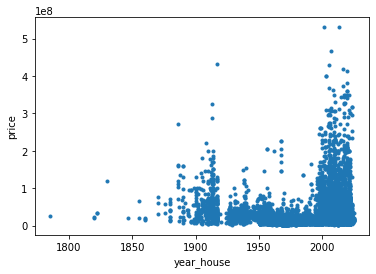

In [28]:
plt.plot(df_time['year_house'], df_time['price'], '.')
plt.xlabel('year_house')
plt.ylabel('price')
plt.show()

Замена nan и слишком низких значений в годе постройки. Кодировать будем минимальным значением. Из-за строения решаюшего дерева этот подход жизнеспособен, так как будет отправлять все nan значения в один лист.

In [29]:
df_raw['year_house'].fillna(1700, inplace=True)

Проверка оставшихся nan значений

In [30]:
df_raw.isna().sum()

metro_name       1973
time_to_metro    1530
num_rooms           0
total_area          0
year_house          0
kitchen_area     1792
repair           9141
price               0
floors              7
num_floor           7
address             5
date                0
coord_width         5
coord_len           5
link                0
dtype: int64

Замена nan значений площади кухни. Будем пользоваться тем же методом, что и с 'year_house'.

Заполним nan значения в ремонте. Вероятно, что пользователь, когда не оставлял информацию о ремонте, сам не знал, какой у него именно ремонт, так как ремонт ничем не выделялся, то есть три последнии категории не подходят. Но так как это вторичка и ремонт не может быть идеальным, скорее всего требуется косметический ремонт.

In [31]:
print(df_raw['repair'].value_counts())
df_raw['repair']=df_raw['repair'].fillna('косметический')


косметический      9564
евро               7909
требует ремонта    6447
дизайнерский       4775
Name: repair, dtype: int64


Проверка оставшихся nan значений

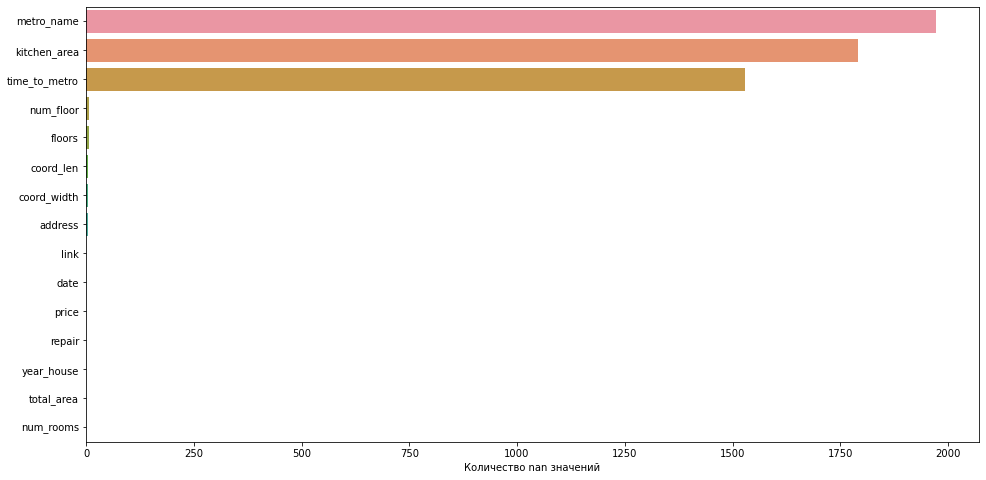

In [32]:
plt.figure(figsize=(16, 8))
a=df_raw.isna().sum().sort_values()[::-1]

sns.barplot(x=a.values, y=a.index)
plt.xlabel('Количество nan значений')
plt.show()

Поступим с оставшимися nan значениями также, как и с годом постройки

In [33]:
df_raw['kitchen_area']=df_raw['kitchen_area'].fillna(0)
df_raw['metro_name']=df_raw['metro_name'].fillna('')
df_raw['time_to_metro']=df_raw['time_to_metro'].fillna(-1)

In [34]:
df_raw.isna().sum()

metro_name       0
time_to_metro    0
num_rooms        0
total_area       0
year_house       0
kitchen_area     0
repair           0
price            0
floors           7
num_floor        7
address          5
date             0
coord_width      5
coord_len        5
link             0
dtype: int64

Удалим оставшиеся nan значения, так как их не так много.

In [35]:
df_raw=df_raw.dropna()
df_raw.shape

(37829, 15)

Сократим немного наши данные.

In [36]:
drop_index_num=[]
drop_index_num.extend(df_raw[df_raw['num_rooms']==2].index.to_list()[7000:])
drop_index_num.extend(df_raw[df_raw['num_rooms']==1].index.to_list()[7000:])
drop_index_num.extend(df_raw[df_raw['num_rooms']==3].index.to_list()[7000:])
df_raw=df_raw.drop(index=drop_index_num, axis=0)
df_raw.groupby('num_rooms').count()

,metro_name,time_to_metro,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
num_rooms,,,,,,,,,,,,,,
0.0,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166
1.0,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
2.0,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
3.0,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
4.0,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193
5.0,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216
6.0,401,401,401,401,401,401,401,401,401,401,401,401,401,401


Размер конечной выборки

In [38]:
df_raw.shape

(27976, 15)

## Сохранение данных

In [37]:
df_raw.to_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\df_after_cleaning.csv")